# <center>Introduction to Data Science</center> 
### <center>Regression Dataset 1</center>
### <center>Patient Treatment</center>
### **<div align="right">By: Pujesh Pradhan </div>**

### Table of Content
* [Objective and Data Description](#Objective-and-Data-Description)
* [Statistical Numerical and Graphical Summaries](#Statistical-Numerical-and-Graphical-Summaries)
* [Algorithm Implementation and Statistical Tests](#Algorithm-Implementation-and-Statistical-Tests)
* [Performance Improvement](#Performance-Improvement)
* [Conclusion](#Conclusion)

### Objective and Data Description

#### Overview
Based on either the treatment/procedures, lab results or the condition of a patient, medical facility decides whether the patient needs to be assigned either as Inpatient or Outpatient. Inpatient care requires patient to stay at the medical facility for atleast a night while patient receiving outpatient cares needs not to spend a night. 
The dataset contains records of various laboratory test results, age and gender of several patients and determines if the patient needs to be admitted to the medical facility or not. 

#### Objective
**With the help of this dataset we would like to find the correlation between the dependent variables and independent variables [SOURCE].**

#### About the Dataset
This dataset is being used from the Kaggle website and the URL to the dataset is: [Patient Treatment](https://www.kaggle.com/manishkc06/patient-treatment-classification)

It has 11 fields and the description of each field of the dataset are: 
1. **HAEMATOCRIT** - Laboratory test result of haematocrit (measures the ratio of the volume of red blood cells to the total volume of blood)
2. **HAEMOGLOBINS** - Laboratory test result of haemoglobins (measures the iron-containing protein in blood that is essential for oxygen transport)
3. **ERYTHROCYTE** - Laboratory test result of erythrocyte (measures the degree of inflammation present in the body)
4. **LEUCOCYTE** - Laboratory test result of leucocyte (measures the level of leukocytes, or white blood cells)
5. **THROMBOCYTE** - Laboratory test result of thrombocyte (measures the number of platelets in your blood)
6. **MCH** - Laboratory test result of MCH (measures the average amount in each of the red blood cells of a protein which carries oxygen around your body)
7. **MCHC** - Laboratory test result of MCHC (measures the average amount of hemoglobin in a group of red blood cells)
8. **MCV** - Laboratory test result of MCV (measures the average size of your red blood cells)
9. **AGE** - Age of the patient 
10. **SEX** - Gender of the patient 
11. **SOURCE** - Inpatient care or Outpatient care (1=Inpatient, 0=Outpatient)

In [1]:
# All the required libraries are imported here.
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, RepeatedStratifiedKFold
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error
from sklearn.feature_selection import SelectKBest, chi2

import math

from scipy import stats

In [2]:
#Describing the size, shape and dimension of the dataset.
patient_data = pd.read_csv('patient_treatment.csv') 
print("The total size of the dataset is {} bytes.".format(patient_data.size))
print("There are {} number of records and {} number of fields with a {} shape.".format(patient_data.shape[0], patient_data.shape[1], patient_data.shape))
print("The dataset has a {} dimensional structure.".format(patient_data.ndim))

The total size of the dataset is 36399 bytes.
There are 3309 number of records and 11 number of fields with a (3309, 11) shape.
The dataset has a 2 dimensional structure.


In [3]:
print("The top 5 records of the dataset are: \n{}".format(patient_data.head()))

The top 5 records of the dataset are: 
   HAEMATOCRIT  HAEMOGLOBINS  ERYTHROCYTE  LEUCOCYTE  THROMBOCYTE   MCH  MCHC  \
0         33.8          11.1         4.18        4.6          150  26.6  32.8   
1         44.6          14.0         6.86        6.3          232  20.4  31.4   
2         42.9          14.0         4.57        6.2          336  30.6  32.6   
3         41.9          14.4         4.67        3.5          276  30.8  34.4   
4         40.6          13.3         4.85       14.9          711  27.4  32.8   

    MCV  AGE SEX  SOURCE  
0  80.9   33   F       1  
1  65.0   36   M       0  
2  93.9   70   F       0  
3  89.7   18   F       0  
4  83.7   36   M       0  


In [4]:
#Replacing the values F as 1 and M as 1 in the sex field of the dataset. 
#The conversion is required to be able to scale the data within a given range.

patient_data['SEX'] = patient_data['SEX'].replace(['F', 'M'], [1, 0])
print("The top 5 updated records of the dataset are: \n{}".format(patient_data.head()))

The top 5 updated records of the dataset are: 
   HAEMATOCRIT  HAEMOGLOBINS  ERYTHROCYTE  LEUCOCYTE  THROMBOCYTE   MCH  MCHC  \
0         33.8          11.1         4.18        4.6          150  26.6  32.8   
1         44.6          14.0         6.86        6.3          232  20.4  31.4   
2         42.9          14.0         4.57        6.2          336  30.6  32.6   
3         41.9          14.4         4.67        3.5          276  30.8  34.4   
4         40.6          13.3         4.85       14.9          711  27.4  32.8   

    MCV  AGE  SEX  SOURCE  
0  80.9   33    1       1  
1  65.0   36    0       0  
2  93.9   70    1       0  
3  89.7   18    1       0  
4  83.7   36    0       0  


In [5]:
#Printing the data types
print("The datatype of the dataset are: \n{}".format(patient_data.dtypes))

The datatype of the dataset are: 
HAEMATOCRIT     float64
HAEMOGLOBINS    float64
ERYTHROCYTE     float64
LEUCOCYTE       float64
THROMBOCYTE       int64
MCH             float64
MCHC            float64
MCV             float64
AGE               int64
SEX               int64
SOURCE            int64
dtype: object


In [6]:
#Statistical description of the data
print(patient_data.describe().T)

               count        mean         std    min     25%     50%     75%  \
HAEMATOCRIT   3309.0   38.226111    5.971943  13.70   34.30   38.70   42.50   
HAEMOGLOBINS  3309.0   12.749350    2.084325   3.80   11.40   12.90   14.20   
ERYTHROCYTE   3309.0    4.544802    0.784510   1.48    4.04    4.58    5.06   
LEUCOCYTE     3309.0    8.715533    4.991299   1.10    5.70    7.60   10.30   
THROMBOCYTE   3309.0  258.893019  112.676139  10.00  191.00  257.00  322.00   
MCH           3309.0   28.230039    2.696520  14.90   27.20   28.70   29.80   
MCHC          3309.0   33.336476    1.247055  26.00   32.70   33.40   34.10   
MCV           3309.0   84.611333    6.916079  54.00   81.50   85.30   88.80   
AGE           3309.0   46.644303   21.874106   1.00   29.00   48.00   64.00   
SEX           3309.0    0.473255    0.499360   0.00    0.00    0.00    1.00   
SOURCE        3309.0    0.398005    0.489561   0.00    0.00    0.00    1.00   

                  max  
HAEMATOCRIT     69.00  
HAE

### Statistical Numerical and Graphical Summaries

The scatter matrix can be constructed to display how the data are distributed across the dataset.



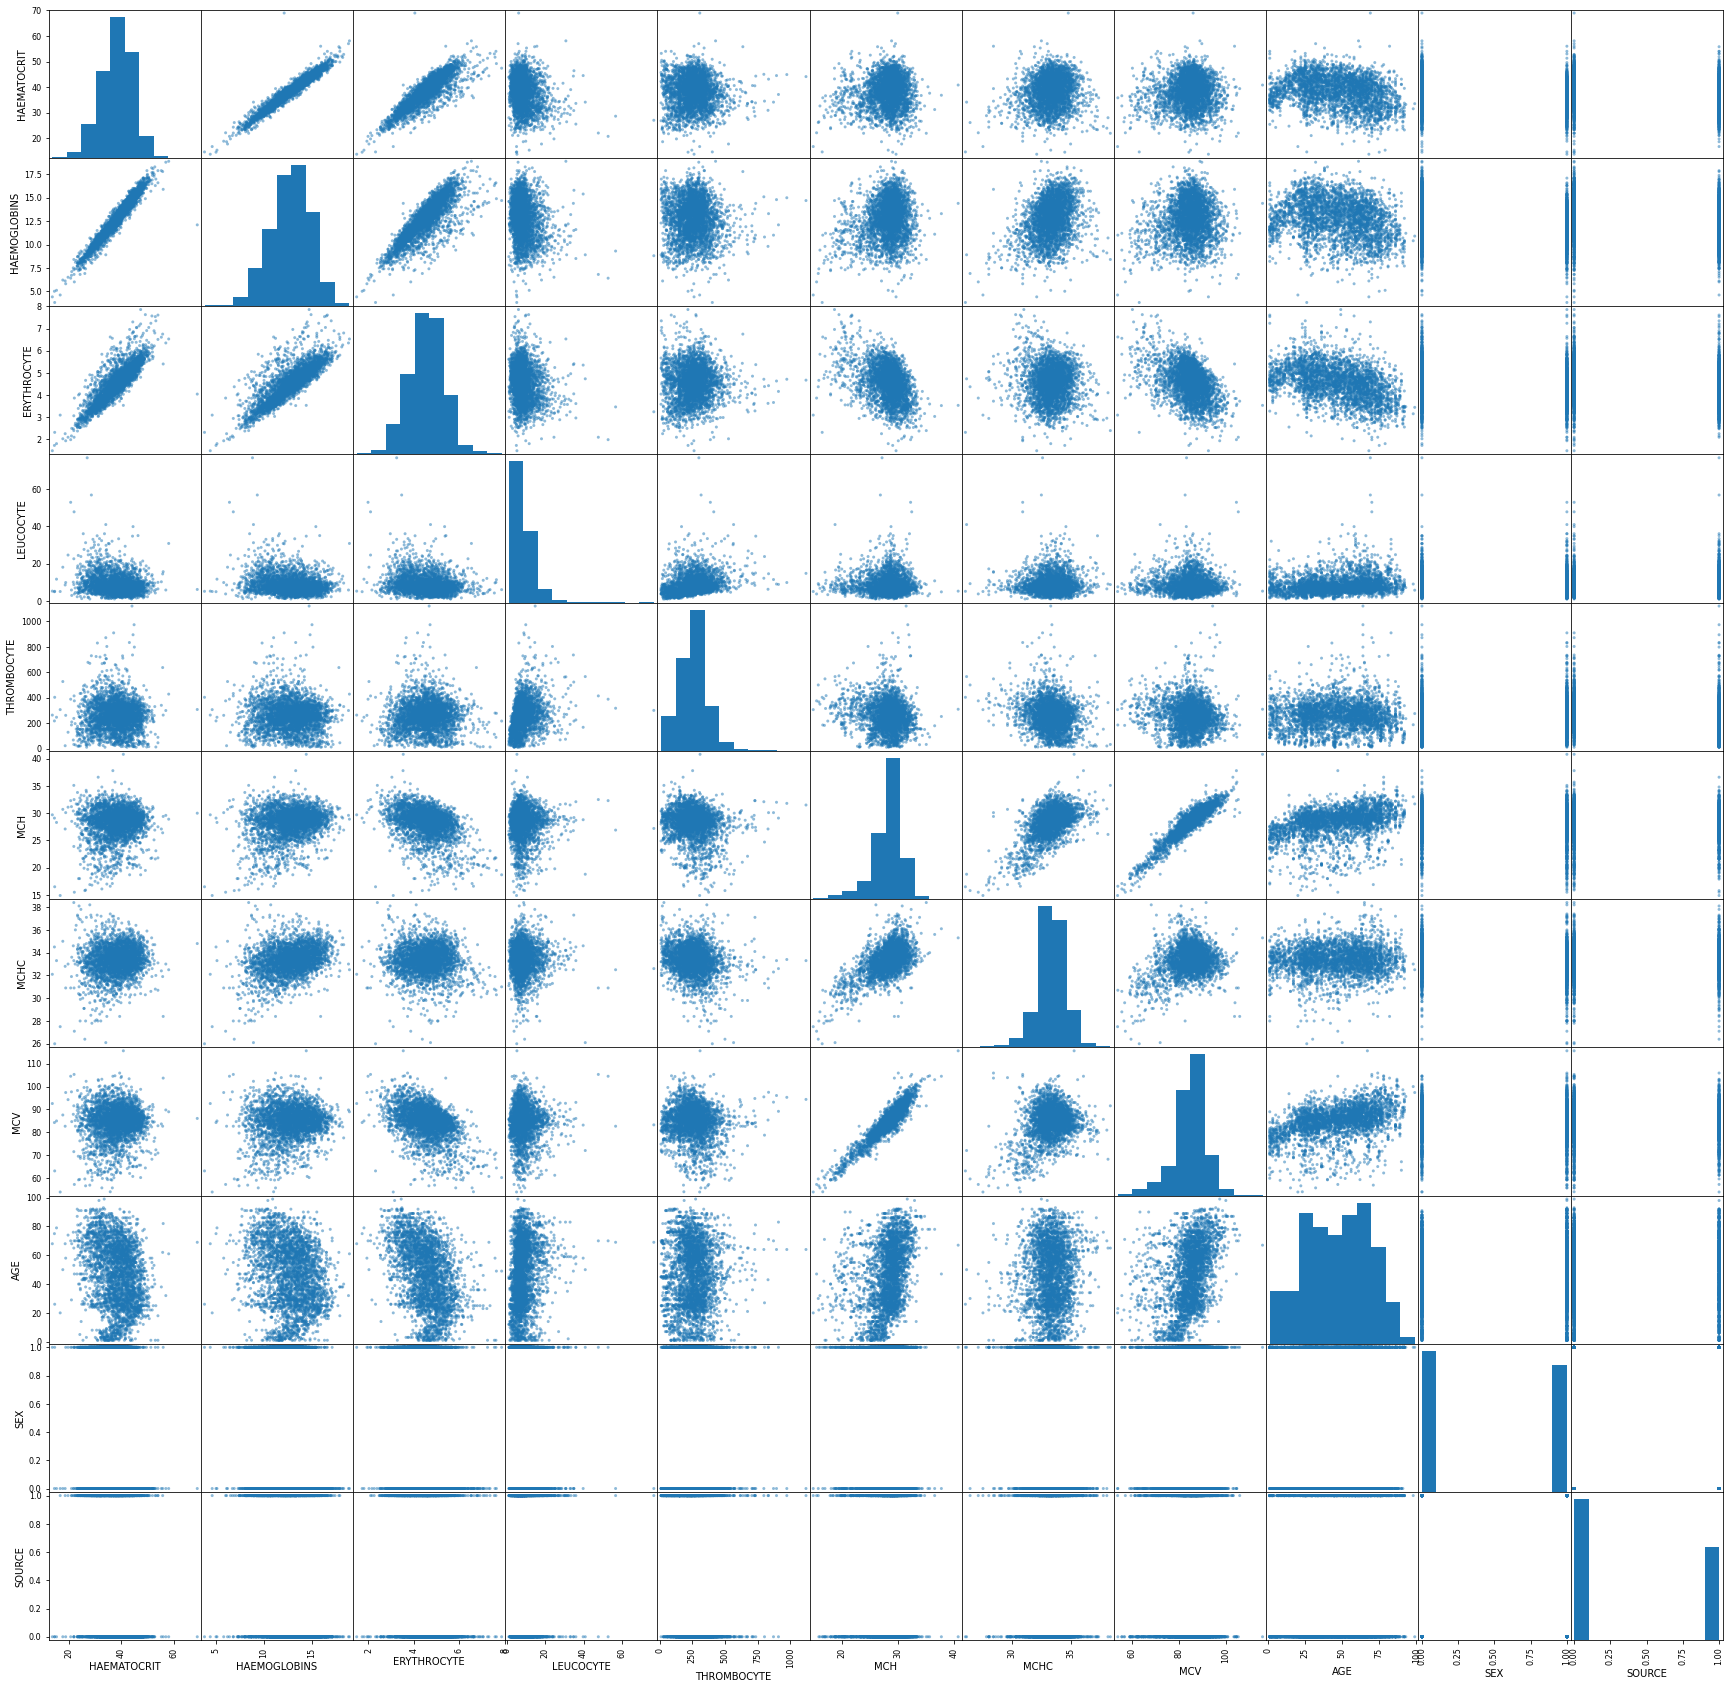

In [7]:
print("The scatter matrix can be constructed to display how the data are distributed across the dataset.\n")

_scatter_matrix_data = scatter_matrix(patient_data, figsize=(30,30), diagonal='hist')

Looking at the graph, we can see that few of the combination of variables show there are some linear correlation among themselves, for example, the graph for MCV against MCH and similarly Haematocrit against Haemoglobins and so on. Let us see how the correlation is defined for these variables and also see for another where the correlation is not much. 

We can plot the correlation between the variables using the heat map as follow. 

In [8]:
print("From the above graph while considering the histograms diagonally we can see that most of the fields are normally distributed. \
    \nWhereas from the scatter plot we can see there are few outliers in the dataset. \
    \nBelow is the list of all the keys of the dataset and determines whether they are normally distributed or skewed. \n")

for data_keys in patient_data.keys():
      skewness = patient_data[data_keys].skew()
      if skewness > 0: 
          print(data_keys, "is Right Skewed")
      elif skewness <0:
          print(data_keys, "is Left Skewed")
      else:
          print(data_keys, "is Normally Distributed")

From the above graph while considering the histograms diagonally we can see that most of the fields are normally distributed.     
Whereas from the scatter plot we can see there are few outliers in the dataset.     
Below is the list of all the keys of the dataset and determines whether they are normally distributed or skewed. 

HAEMATOCRIT is Left Skewed
HAEMOGLOBINS is Left Skewed
ERYTHROCYTE is Left Skewed
LEUCOCYTE is Right Skewed
THROMBOCYTE is Right Skewed
MCH is Left Skewed
MCHC is Left Skewed
MCV is Left Skewed
AGE is Left Skewed
SEX is Right Skewed
SOURCE is Right Skewed


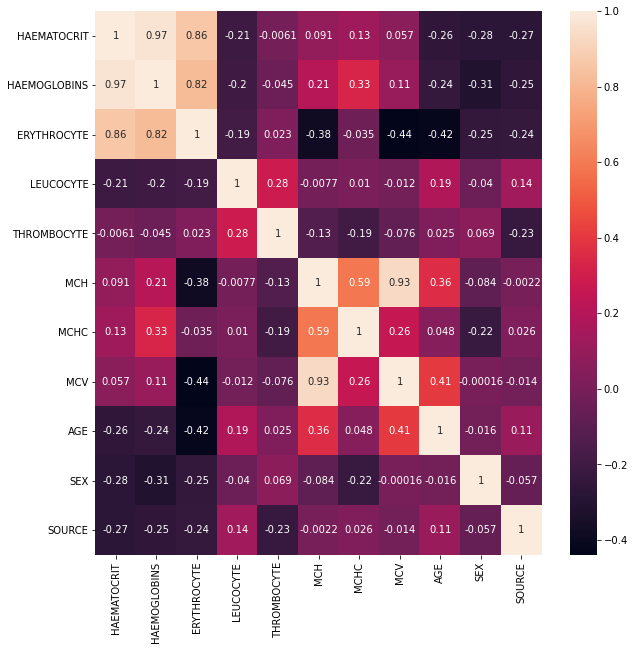

In [9]:
correlations = patient_data.corr()
plt.figure(figsize=(10,10))
heatmap_ = sns.heatmap(correlations, annot=True)

As seen in the scatter plot above, and comparing with the heatmap we can see that they both predicts the correlation between different variables. The heatmap shows us how well the correlation between the variables are created by providing us with a correlation coeffeicient value. 

The correlation is 1 for the diagonal since plotting the correlation of the same variables always gives out strong correlation. 

The heatmap highlights the pairs that have strong positive correlation with lighter color while the negative correlations are highlighted with darker colors. 

### Algorithm Implementation and Statistical Tests 

Let us now plot the linear regression for few of the pair variables below. 

In [10]:
#Linear Regression between HAEMOGLOBINS and ERYTHROCYTE.
haemoglobins_data = patient_data['HAEMOGLOBINS'].values.reshape(-1,1)
erythrocyte_data = patient_data['ERYTHROCYTE'].values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(haemoglobins_data, erythrocyte_data, test_size=0.25)

scaler = MinMaxScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

regression = LinearRegression()
regression.fit(X_train, y_train)

y_pred = regression.predict(X_test)

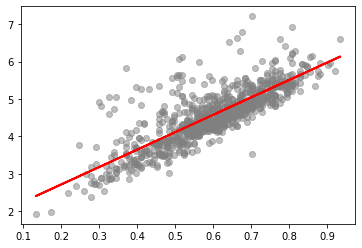

In [11]:
#Plotting the points and the line of best fits. Here the scatter plot is plotted between haemoglobins and erythrocyte and the best line of fit is created by plotting a line 
#between the predicted value and the explanatory variable values.
plt.scatter(X_test, y_test, c="grey", alpha=0.5)
plt.plot(X_test, y_pred, color='red', linewidth=2)

In [12]:
print("Thus, the line of best fit for the above can be found using : \n y = {} + {}x. \n".format(regression.intercept_[0], regression.coef_[0][0]))

mse = mean_squared_error(y_test, y_pred) 
print("Where the Slope is {} and the y intercept is {} \n\
with mean squared error of {} and \nroot mean squared error of {}"
      .format(regression.coef_[0][0], regression.intercept_[0], mse, math.sqrt(mse)))

Thus, the line of best fit for the above can be found using : 
 y = 1.7899913403609542 + 4.650123374958852x. 

Where the Slope is 4.650123374958852 and the y intercept is 1.7899913403609542 
with mean squared error of 0.20358860374500623 and 
root mean squared error of 0.451207938477379


In [13]:
pearson_coef, p_value = stats.pearsonr(pd.DataFrame(haemoglobins_data)[0], pd.DataFrame(erythrocyte_data)[0])
print("The Pearson coefficient of the variables is r = {}".format(pearson_coef))

The Pearson coefficient of the variables is r = 0.8152210741293029


Here, the strength of linear regression is strong and the distance is positive as per the value of Pearson coefficient. The Pearson coefficient is supported by the positive slope value that shows the correlation between the Haemoglobin and Erythrocyte is positive. 

In [14]:
print("Similarly the coefficient of variation is : {}%".format(regression.score(X_test, y_test)*100))

Similarly the coefficient of variation is : 65.5989818804858%


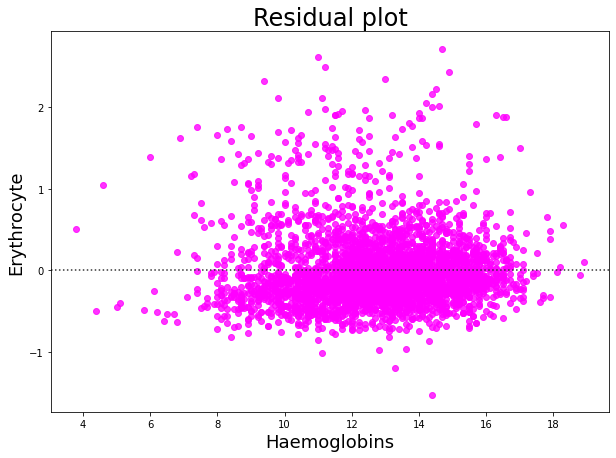

In [32]:
fig = plt.figure(figsize = (10, 7))
sns.residplot(pd.DataFrame(haemoglobins_data)[0], pd.DataFrame(erythrocyte_data)[0], color='magenta')

# title and labels
plt.title('Residual plot', size=24)
plt.xlabel('Haemoglobins', size=18)
plt.ylabel('Erythrocyte', size=18);

Here, the residual plot which gives an idea of the variability in the data demonstrates a uniformly distributed about x-axis. It displays a Homoscedastic pattern. 

In [35]:
#Checking if HAEMOGLOBINS and AGE are correlated. 
haemoglobins_data = patient_data['HAEMOGLOBINS'].values.reshape(-1,1)
age_data = patient_data['AGE'].values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(age_data, haemoglobins_data, test_size=0.25)

scaler = MinMaxScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

regression = LinearRegression()
regression.fit(X_train, y_train)

y_pred = regression.predict(X_test)

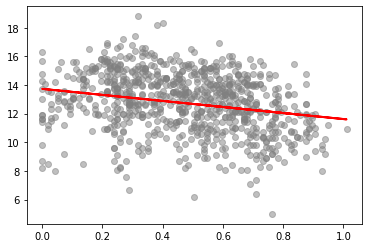

In [36]:
#Plotting the points and the line of best fits. Here the scatter plot is plotted between haemoglobins and age and the best line of fit is created by plotting a line 
#between the predicted value and the explanatory variable values.
plt.scatter(X_test, y_test, c="grey", alpha=0.5)
plt.plot(X_test, y_pred, color='red', linewidth=2)

In [37]:
print("Thus, the line of best fit for the above can be found using : \n y = {} + ({})x. \n".format(regression.intercept_[0], regression.coef_[0][0]))

mse = mean_squared_error(y_test, y_pred) 
print("Where the Slope is {} and the y intercept is {} \n\
with mean squared error of {} and \nroot mean squared error of {}"
      .format(regression.coef_[0][0], regression.intercept_[0], mse, math.sqrt(mse)))

Thus, the line of best fit for the above can be found using : 
 y = 13.730995648698595 + (-2.1084613808368373)x. 

Where the Slope is -2.1084613808368373 and the y intercept is 13.730995648698595 
with mean squared error of 3.992196091322296 and 
root mean squared error of 1.9980480703232082


In [38]:
pearson_coef, p_value = stats.pearsonr(pd.DataFrame(haemoglobins_data)[0], pd.DataFrame(age_data)[0])
print("The Pearson coefficient of the variables is r = {}".format(pearson_coef))

The Pearson coefficient of the variables is r = -0.2411697377282028


Here, the strength of linear regression is weak and the distance is negative as per the value of Pearson coefficient. The Pearson coefficient is supported by the negative slope that shows the correlation between the Haemoglobin and Age is negative. 

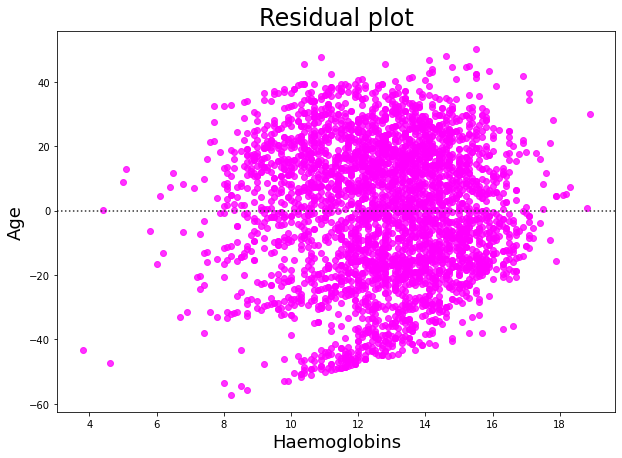

In [40]:
fig = plt.figure(figsize = (10, 7))
sns.residplot(pd.DataFrame(haemoglobins_data)[0], pd.DataFrame(age_data)[0], color='magenta')

# title and labels
plt.title('Residual plot', size=24)
plt.xlabel('Haemoglobins', size=18)
plt.ylabel('Age', size=18);

Also, from the heatmap above we can see that there is no any variable that has a strong correlation with the target variable. 

We will use the SelectKBest and chi2 method to find the most important featuers and find the regression and correlation between the predictor and target variables. 

In [21]:
#Considering all of the features to find the top features that helps to determine the Potability of the water.
X = patient_data.iloc[:, 0:10]
y = patient_data.iloc[:, -1]

select_k_best = SelectKBest(score_func=chi2, k=5)

best_result = select_k_best.fit(X, y)

scores = pd.DataFrame(best_result.scores_)
columns = pd.DataFrame(X.columns)

feature_scores = pd.concat([columns, scores], axis=1)
feature_scores.columns = ['Field', 'Score']

print(feature_scores.nlargest(10, 'Score'))

          Field        Score
4   THROMBOCYTE  8547.951143
8           AGE   437.092039
0   HAEMATOCRIT   228.922785
3     LEUCOCYTE   184.512253
1  HAEMOGLOBINS    73.270731
2   ERYTHROCYTE    25.384510
9           SEX     5.707528
7           MCV     0.345889
6          MCHC     0.104526
5           MCH     0.004000


In [22]:
#Finding the Multi Linear Regression between Thromobocyte and age against Source.
#Finding the correlation of THROMBOCYTE and AGE with the target variable SOURCE.
predictor_data = patient_data[['THROMBOCYTE', 'AGE']].values.reshape(-1,2)
target_data = patient_data['SOURCE']

X_train, X_test, y_train, y_test = train_test_split(predictor_data, target_data, test_size=0.25)

scaler = MinMaxScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

regression = LinearRegression()
regression.fit(X_train, y_train)

y_pred = regression.predict(X_test)

In [23]:
print("Thus, the line of best fit for the above can be found using : \n y = {} + ({})X1 + ({})X2. \n".
      format(regression.intercept_, regression.coef_[0], regression.coef_[1]))

mse = mean_squared_error(y_test, y_pred) 
print("Where the Slope are {} and the y intercept is {} \n\
with mean squared error of {} and \nroot mean squared error of {}"
      .format(regression.coef_, regression.intercept_, mse, math.sqrt(mse)))

Thus, the line of best fit for the above can be found using : 
 y = 0.5315770285368275 + (-1.144041380648387)X1 + (0.2754058731323951)X2. 

Where the Slope are [-1.14404138  0.27540587] and the y intercept is 0.5315770285368275 
with mean squared error of 0.2233140791408615 and 
root mean squared error of 0.47256119089580506


In [24]:
pearson_coef = patient_data[['THROMBOCYTE', 'AGE', 'SOURCE']].corr()
print("The Pearson coefficient of the variables are : \n{}".format(pearson_coef))

The Pearson coefficient of the variables are : 
             THROMBOCYTE       AGE    SOURCE
THROMBOCYTE      1.00000  0.024690 -0.229550
AGE              0.02469  1.000000  0.113494
SOURCE          -0.22955  0.113494  1.000000


### Performance Improvement

Logistic Regression is a Regression technique that is used for classification with a dichotomous dependent variable and one or more nominal,ordinal or ratio independent variable. Thus, for the above multi linear regression, we will use the Logistic Regression to find the best configuration using the GridSearchCV. 

In [25]:
# Defining the dataset for Logistic Regression.
predictor_data = patient_data[['THROMBOCYTE', 'AGE', 'HAEMATOCRIT']].values.reshape(-1,3)
target_data = patient_data['SOURCE']

X_train, X_test, y_train, y_test = train_test_split(predictor_data, target_data)

# Data normalization  
scaler = MinMaxScaler()
scaler.fit_transform(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Defining models and parameters for our grid search 
regression = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c = [0.01, 0.1, 1.0, 10]

param_grid = dict(solver=solvers,penalty=penalty,C=c)
# Creating a Repeated Stratifier KFold with 10 splits and 2 repeats for the cross-validator
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=2, random_state=1)

# Parameterizing the grid search
grid_search = GridSearchCV(estimator=regression, param_grid=param_grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, np.ravel(y_train))

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.695895 using {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.599759 (0.001654) with: {'C': 0.01, 'penalty': 'l2', 'solver': 'newton-cg'}
0.599759 (0.001654) with: {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
0.599759 (0.001654) with: {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}
0.661233 (0.015826) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.661233 (0.015826) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.659016 (0.018389) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.691662 (0.021003) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.691662 (0.021003) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.690051 (0.020172) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.695895 (0.023475) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.695895 (0.023475) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.695088 (0.022300) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}


Here we can see that Logistic Regression with <br/>
C = 10 <br/>
penalty = l2 <br/>
solver = newton-cg <br/>
gives us the best result for the dataset when THROMBOCYTE, AGE and HAEMATOCRIT are explanatory variables and the SOURCE is the response variable. 

In [26]:
# Defining the dataset for Logistic Regression.
predictor_data = patient_data[['THROMBOCYTE', 'AGE', 'HAEMATOCRIT']].values.reshape(-1,3)
target_data = patient_data['SOURCE']

X_train, X_test, y_train, y_test = train_test_split(predictor_data, target_data)

# Data normalization  
scaler = MinMaxScaler()
scaler.fit_transform(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Defining models and parameters for our grid search 
regression = LogisticRegression(penalty='l2', solver='newton-cg', C=10)
regression.fit(X_train, y_train)

y_pred = regression.predict(X_test)

In [27]:
print(regression.coef_[0][0])

-5.172125772710793


In [28]:
print("Thus, the line of best fit for the above can be found using : \n y = {} + ({})X1 + ({})X2 + ({})X3. \n".
      format(regression.intercept_, regression.coef_[0][0], regression.coef_[0][1], regression.coef_[0][2]))

mse = mean_squared_error(y_test, y_pred) 
print("Where the Slope are {} and the y intercept is {} \n\
with mean squared error of {} and \nroot mean squared error of {}"
      .format(regression.coef_[0], regression.intercept_, mse, math.sqrt(mse)))

Thus, the line of best fit for the above can be found using : 
 y = [2.92494828] + (-5.172125772710793)X1 + (0.43683772984059827)X2 + (-4.340518027012843)X3. 

Where the Slope are [-5.17212577  0.43683773 -4.34051803] and the y intercept is [2.92494828] 
with mean squared error of 0.2971014492753623 and 
root mean squared error of 0.5450701324374344


In [29]:
pearson_coef = patient_data[['THROMBOCYTE', 'AGE', 'SOURCE']].corr()
print("The Pearson coefficient of the variables are : \n{}".format(pearson_coef))

The Pearson coefficient of the variables are : 
             THROMBOCYTE       AGE    SOURCE
THROMBOCYTE      1.00000  0.024690 -0.229550
AGE              0.02469  1.000000  0.113494
SOURCE          -0.22955  0.113494  1.000000


### Conclusion

Thus, we can conclude that with the current dataset, we cannot find a proper explanatory variables that correlates strongly with the target variable. LEUCOCYTE looks to have the better correlation however it is still low and the correlation is weak. Moreover, there is a strong correlation between few variable such as Haemoglobin, Haematocrit and Erythrocyte. 

Similary, due to this lack of correlation we are not able to predict the classification with higher accuracy using other algorithms such as KNN, Decision Tree and Neural Network. 